<a href="https://colab.research.google.com/github/taliyameyswara/emotional-speech-classification/blob/main/Emotional_Speech_Classification_Using_ANN_Underfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emotional Speech Classification Using ANN 🗣️🔉**
> 👯‍♀️ Kelompok 5 - A11.44UG1 <br>
> 📡 Data Sinyal <br>
> 🙏 Model Overfiting <br>


In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# **Mempersiapkan Dataset 🔋**
Menggunakan [Dataset Toronto Emotional Speech Set Tess](https://www.kaggle.com/ejlok1/toronto-emotional-speech-set-tess) dari kaggle.

In [2]:
import pandas as pd
import numpy as np
import os # Provides a way of using operating system dependent functionality.
import seaborn as sns
import matplotlib.pyplot as plt # Enable plot in the notebook
import librosa # Librosa provides the audio analysis
import librosa.display # Need to implictly import from librosa
from IPython.display import Audio # Import the audio playback widget
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense, Dropout

In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"taliyameyswara","key":"f1f7923ce6f64df970c7fec88b14b142"}'}

In [5]:
# Membuat directory bernama kaggle dan copy file kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
# Mengubah permission file
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Mengunduh Dataset
# https://www.kaggle.com/datasets/mmoreaux/audio-cats-and-dogs
dataset_name = 'ejlok1/toronto-emotional-speech-set-tess'
!kaggle datasets download -d {dataset_name}

 99% 422M/428M [00:03<00:00, 151MB/s]
100% 428M/428M [00:03<00:00, 113MB/s]


# **Ekstrasi Data 💥**

In [7]:
# Melakukan ekstraksi pada file zip
import zipfile,os

# Lokasi file zip yang telah diunduh
local_zip = 'toronto-emotional-speech-set-tess.zip'

# Membuat direktori baru bernama "dataset" jika belum ada
dataset_dir = 'dataset'
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

zip_ref = zipfile.ZipFile(local_zip, 'r')
# Mengekstrak semua isi file zip ke direktori "dataset"
zip_ref.extractall(dataset_dir)
zip_ref.close()

# Menampilkan daftar file dan folder di dalam direktori "dataset"
print(os.listdir(dataset_dir))

['tess toronto emotional speech set data', 'TESS Toronto emotional speech set data']


In [8]:
paths = []
labels = []
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is already Loaded!')

Dataset is already Loaded!


In [9]:
paths[:5]

['dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_pass_angry.wav',
 'dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_mob_angry.wav',
 'dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_half_angry.wav',
 'dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_jar_angry.wav',
 'dataset/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_rat_angry.wav']

In [10]:
# length of the dataset samples
len(paths)

2800

In [11]:
# Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,dataset/tess toronto emotional speech set data...,angry
1,dataset/tess toronto emotional speech set data...,angry
2,dataset/tess toronto emotional speech set data...,angry
3,dataset/tess toronto emotional speech set data...,angry
4,dataset/tess toronto emotional speech set data...,angry


In [12]:
# count the all label
df['label'].value_counts()

label
angry      400
happy      400
sad        400
fear       400
ps         400
disgust    400
neutral    400
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

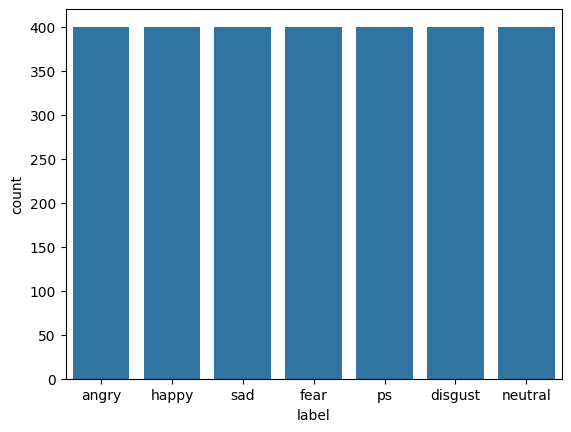

In [13]:
# data analysis of all label
sns.countplot(x = df['label'], data=df)

In [14]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(5,3))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    x_db = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(5,3))
    plt.title(emotion, size=20)
    librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

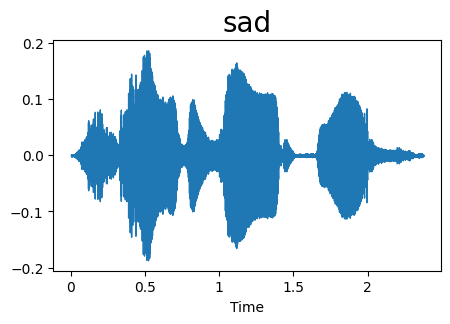

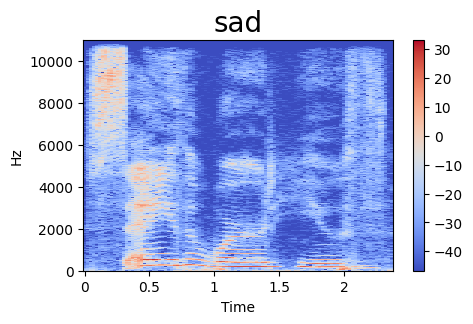

In [15]:
# sad label emotion speech analysis
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

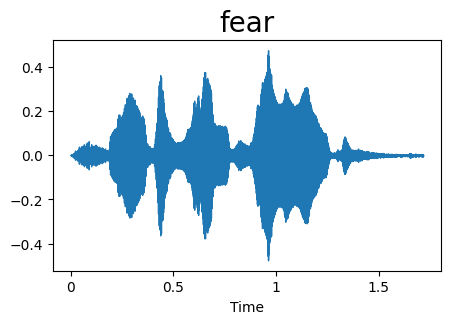

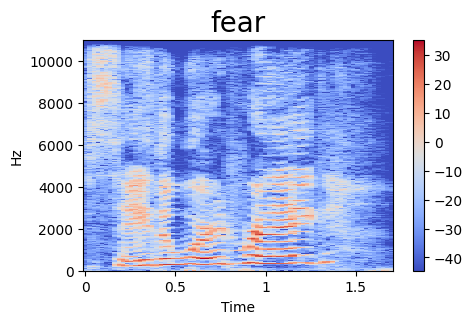

In [16]:
# fear label emotion speech analysis
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

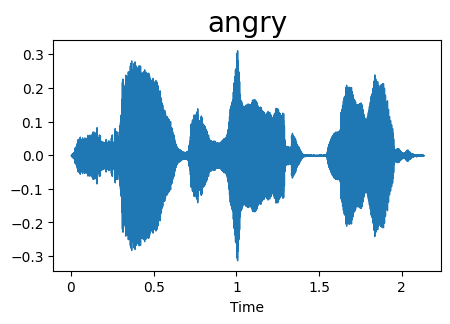

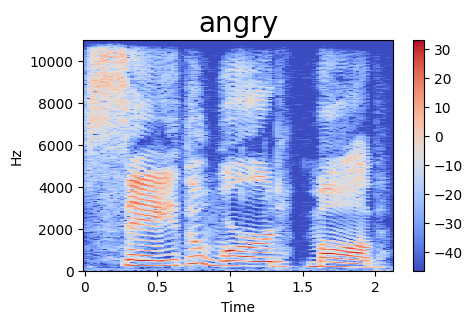

In [17]:
# angry label emotion speech analysis
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

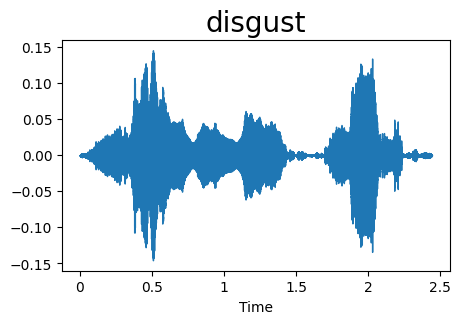

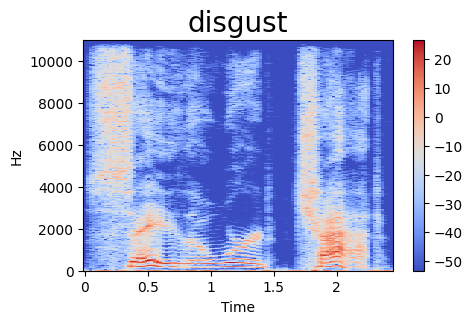

In [18]:
# disgust label emotion speech analysis
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

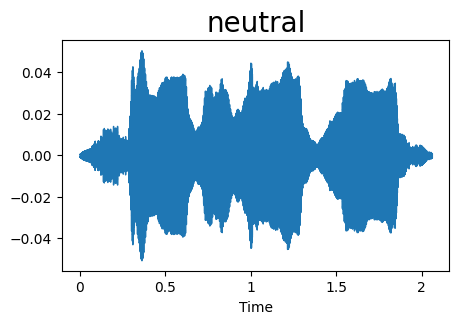

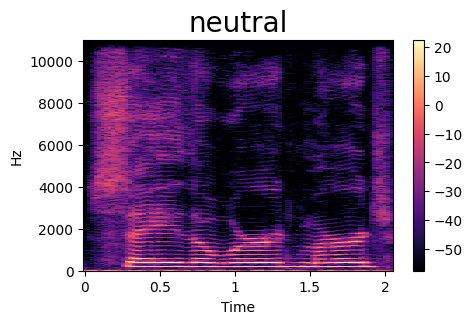

In [19]:
# neutral label emotion speech analysis
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

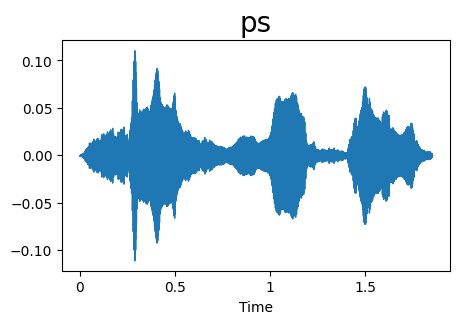

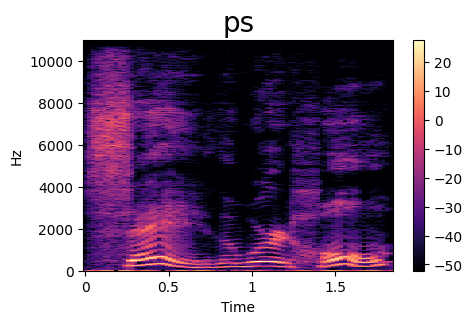

In [20]:
# ps label emotion speech analysis
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

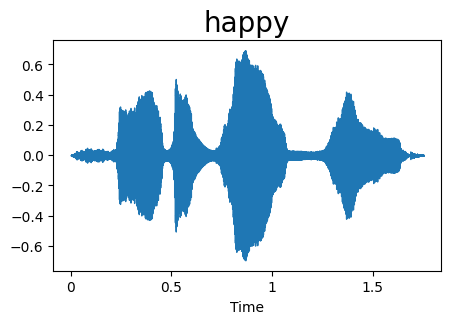

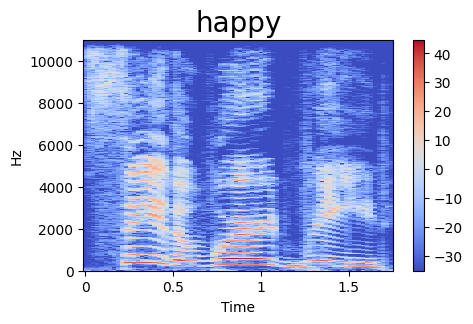

In [21]:
# happy label emotion speech analysis
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **Feature Extraction 🧩**
> Ekstrasi MFCC dari fitur audio yang diberikan

In [22]:
def feature_extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)

> Hasil ekstrasi audio menjadi vektor fitur

In [23]:
feature_extract_mfcc(df['speech'][0])

array([-334.94592  ,   37.075512 ,   -7.904568 ,   -1.8379068,
        -12.8784685,    6.4874387,    2.520782 ,  -12.202131 ,
         -6.53204  ,    1.6439863,  -17.72807  ,    9.591107 ,
         -9.333745 ], dtype=float32)

> Menghasilkan vektor fitur MFCC untuk setiap file audio

In [24]:
mfcc = df['speech'].apply(lambda x: feature_extract_mfcc(x))
mfcc

0       [-334.94592, 37.075512, -7.904568, -1.8379068,...
1       [-350.88992, 74.09218, -2.3219209, 7.8491626, ...
2       [-322.57584, 47.85948, -25.91174, 4.019515, -2...
3       [-289.10486, 78.74502, 2.2043347, -5.4672093, ...
4       [-325.0482, 52.04364, -21.359823, 3.8501308, -...
                              ...                        
2795    [-331.03552, 48.584187, -25.937048, -4.8479657...
2796    [-340.9328, 93.7364, -26.861814, 0.34102386, -...
2797    [-354.5709, 64.17273, -31.288214, 14.938522, -...
2798    [-305.5626, 70.34936, -42.098427, -7.0920105, ...
2799    [-389.8703, 94.92119, -6.0177207, -5.5790243, ...
Name: speech, Length: 2800, dtype: object

In [25]:
X=[x for x in mfcc]
X=np.array(X)
X.shape ##(jumlah_sampel, dimensi_fitur)

(2800, 13)

> Menambah dimensi baru

In [26]:
X=np.expand_dims(X,-1)
X.shape

(2800, 13, 1)

> Label dalam bentuk one-hot encoding <br>
Mengubah 'neutral' menjadi [1, 0], selain itu [0, 0]

In [27]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(df[['label']])
y = y.toarray()

In [28]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [29]:
y.shape

(2800, 7)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (1960, 13, 1)
X_test: (840, 13, 1)
y_train: (1960, 7)
y_test: (840, 7)


# **Modelling 👯‍♀️**
> Menggunakan model neural network ANN

In [31]:
model = Sequential([
    # Input Layer
    Dense(13, activation='relu', input_shape=(13,)),

    # Output Layer
    Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 7)                 98        
                                                                 
Total params: 280 (1.09 KB)
Trainable params: 280 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(X_train,y_train,
                    epochs=30,
                    validation_data=(X_test,y_test))

Epoch 1/30
62/62 [==============================] - 1s 7ms/step - loss: 150.2106 - accuracy: 0.1327 - val_loss: 94.2249 - val_accuracy: 0.1667
Epoch 2/30
62/62 [==============================] - 0s 4ms/step - loss: 68.2336 - accuracy: 0.1561 - val_loss: 43.4671 - val_accuracy: 0.1714
Epoch 3/30
62/62 [==============================] - 0s 3ms/step - loss: 34.8462 - accuracy: 0.1638 - val_loss: 23.2090 - val_accuracy: 0.2012
Epoch 4/30
62/62 [==============================] - 0s 3ms/step - loss: 17.7473 - accuracy: 0.1872 - val_loss: 12.1388 - val_accuracy: 0.2488
Epoch 5/30
62/62 [==============================] - 0s 4ms/step - loss: 10.1529 - accuracy: 0.2204 - val_loss: 7.5161 - val_accuracy: 0.2440
Epoch 6/30
62/62 [==============================] - 0s 7ms/step - loss: 5.9268 - accuracy: 0.2372 - val_loss: 4.0304 - val_accuracy: 0.2405
Epoch 7/30
62/62 [==============================] - 0s 7ms/step - loss: 3.7822 - accuracy: 0.2372 - val_loss: 3.5933 - val_accuracy: 0.2464
Epoch 8/30

In [42]:
# Evaluasi model pada data uji
loss, accuracy = model.evaluate(X_test, y_test)

# Mencetak akurasi dan loss
print("Accuracy of our model on test data: {:.2f}%".format(accuracy * 100))
print("Loss of our model on test data: {:.4f}".format(loss))

# Evaluasi model pada data uji
loss2, accuracy2 = model.evaluate(X_train, y_train)

# Mencetak akurasi dan loss
print("Accuracy of our model on train data: {:.2f}%".format(accuracy2 * 100))
print("Loss of our model on train data: {:.4f}".format(loss2))


27/27 [==============================] - 0s 10ms/step - loss: 1.0736 - accuracy: 0.5786
Accuracy of our model on test data: 57.86%
Loss of our model on test data: 1.0736
62/62 [==============================] - 1s 7ms/step - loss: 1.0274 - accuracy: 0.5959
Accuracy of our model on train data: 59.59%
Loss of our model on train data: 1.0274


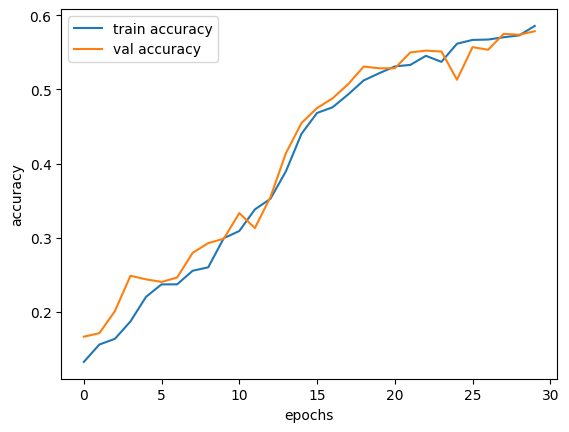

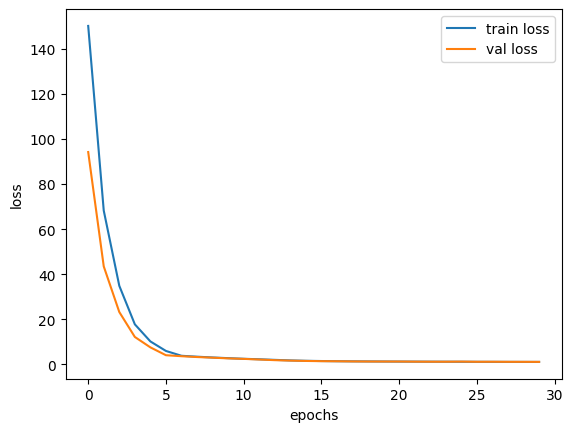

In [43]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Model Underfiting karena akurasi training dan validasi rendah, maka dapat dilakukan perbaikan sebagai berikut

  > Membagi data menjadi data training dan data testing dengan memperbanyak jumlah data training

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2380, 40, 1) (420, 40, 1) (2380, 7) (420, 7)


  > Menambah kompleksitas model dengan menambah satu layer dan menambahkan dropout untuk mengurangi kapasitas model.

In [51]:
new_model = Sequential([
    Dense(100, activation='relu', input_shape=(13,)),
    Dropout(0,2),
    Dense(200, activation='relu'),
    Dropout(0,2),
    # Dense(100, activation='relu'),
    Dense(7, activation='softmax')
])
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               1400      
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 200)               20200     
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_15 (Dense)            (None, 7)                 1407      
                                                                 
Total params: 23007 (89.87 KB)
Trainable params: 23007 (89.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
history = new_model.fit(X_train,y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_test,y_test))

Epoch 1/50
31/31 [==============================] - 1s 12ms/step - loss: 8.7097 - accuracy: 0.1898 - val_loss: 2.3289 - val_accuracy: 0.3095
Epoch 2/50
31/31 [==============================] - 0s 6ms/step - loss: 1.6040 - accuracy: 0.4413 - val_loss: 1.2443 - val_accuracy: 0.5726
Epoch 3/50
31/31 [==============================] - 0s 6ms/step - loss: 0.9740 - accuracy: 0.6515 - val_loss: 1.0301 - val_accuracy: 0.6167
Epoch 4/50
31/31 [==============================] - 0s 6ms/step - loss: 0.9399 - accuracy: 0.6602 - val_loss: 1.0603 - val_accuracy: 0.5917
Epoch 5/50
31/31 [==============================] - 0s 6ms/step - loss: 0.8638 - accuracy: 0.6898 - val_loss: 0.8260 - val_accuracy: 0.6893
Epoch 6/50
31/31 [==============================] - 0s 5ms/step - loss: 0.7602 - accuracy: 0.7189 - val_loss: 1.1488 - val_accuracy: 0.6083
Epoch 7/50
31/31 [==============================] - 0s 4ms/step - loss: 0.7584 - accuracy: 0.7184 - val_loss: 0.8309 - val_accuracy: 0.7095
Epoch 8/50
31/31 [=

In [56]:
# Evaluasi model pada data uji
loss, accuracy = new_model.evaluate(X_test, y_test)

# Mencetak akurasi dan loss
print("Accuracy of our model on test data: {:.2f}%".format(accuracy * 100))
print("Loss of our model on test data: {:.4f}".format(loss))

# Evaluasi model pada data uji
loss2, accuracy2 = new_model.evaluate(X_train, y_train)

# Mencetak akurasi dan loss
print("Accuracy of our model on train data: {:.2f}%".format(accuracy2 * 100))
print("Loss of our model on train data: {:.4f}".format(loss2))


27/27 [==============================] - 0s 7ms/step - loss: 0.6415 - accuracy: 0.8036
Accuracy of our model on test data: 80.36%
Loss of our model on test data: 0.6415
62/62 [==============================] - 1s 8ms/step - loss: 0.5415 - accuracy: 0.8235
Accuracy of our model on train data: 82.35%
Loss of our model on train data: 0.5415


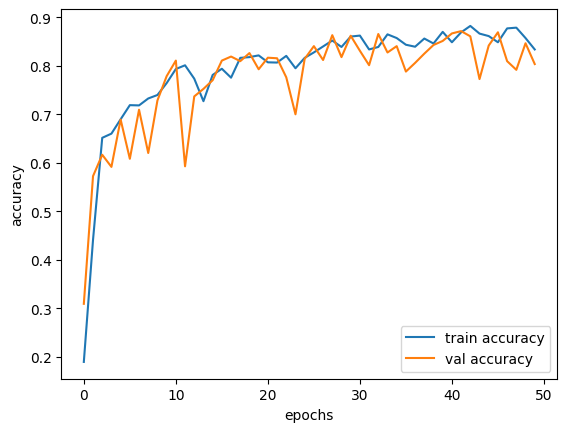

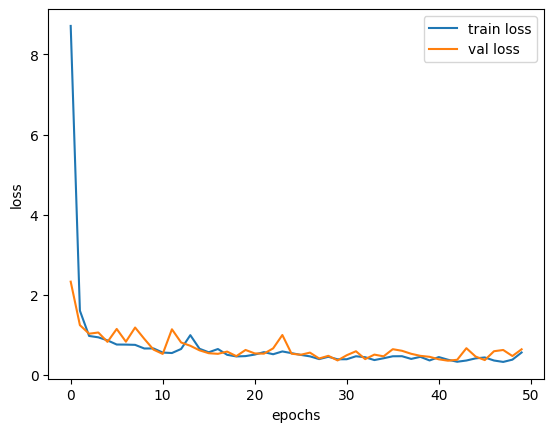

In [57]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [58]:
!pip install pydub

In [60]:
# filename = "dataset/TESS Toronto emotional speech set data/YAF_happy/YAF_bone_happy.wav"
filename = "owh.wav"
data, i_sr = librosa.load(filename)

# Ekstrak fitur MFCC dengan dimensi yang sesuai
i_f3 = librosa.feature.mfcc(y=data, sr=i_sr, n_mfcc=13)
i_f3 = np.mean(i_f3.T, axis=0)
i_f3 = i_f3.reshape(1, -1)

from sklearn.preprocessing import LabelEncoder

# Mendefinisikan labelencoder dan mengonversi kelas menjadi label
labelencoder = LabelEncoder()
# labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
labelencoder.fit_transform(df[['label']])


# Lakukan prediksi dengan model
predicted_label = new_model.predict(i_f3)
a = np.argmax(predicted_label, axis=1)
b = labelencoder.inverse_transform(a)
print(b[0])


1/1 [==============================] - 0s 86ms/step
sad
